# Evaluate the quality of the three splitting and report the best one. The output qualities of the splitting will be included in table 

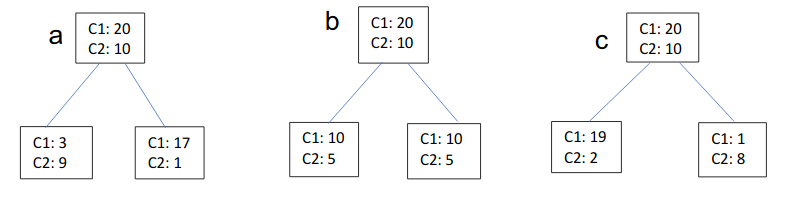

In [4]:
from IPython.display import Image
Image("img.png")

In [ ]:
from math import log
import numpy as np
import pandas as pd
Gini_array = []
Entropy_array = []
Misclass_array = []

def calcpercent(node):
    nodesum = sum(node.values())
    percents = {c:v/nodesum for c,v in node.items()}
    return nodesum, percents

# giniscore calculates the score for a node using above formula
def giniscore(node):
    nodesum, percents = calcpercent(node)
    score = round(1 - sum([i**2 for i in percents.values()]), 2)
    return score

# entropy score calculates the score for a node using above formula
def entropyscore(node):
    nodesum, percents = calcpercent(node)
    score = round(sum([-i*log(i,2) for i in percents.values()]), 2)
    return score

#misclass Misclass_a_left = 1 - max(3/12, 9/12)
def misclass(node):
    nodesum, percents = calcpercent(node)
    score = round(1 - max([i for i in percents.values()]), 2)
    return score

def infogain(parent, children, criterion):
    score = {'gini': giniscore, 'entropy': entropyscore, 'misclass' : misclass}
    metric = score[criterion]
    parentscore = metric(parent)
    parentsum = sum(parent.values())
    weighted_child_score = sum([metric(i)*sum(i.values())/parentsum  for i in children])
    gain = round((parentscore - weighted_child_score),2)
    return gain
#a
parent_node = {'C1': 20, 'C2':10}
node1 = {'C1':3, 'Blue':9}
node2 = {'C1':17, 'Blue':1}
gini_gain = infogain(parent_node, [node1, node2], 'gini')
entropy_gain = infogain(parent_node, [node1, node2], 'entropy')
misclass_gain = infogain(parent_node, [node1, node2], 'misclass')
Gini_array.append(gini_gain)
Entropy_array.append(entropy_gain)
Misclass_array.append(misclass_gain)

#b
parent_node = {'C1': 20, 'C2':10}
node1 = {'C1':10, 'Blue':5}
node2 = {'C1':10, 'Blue':5}
gini_gain = infogain(parent_node, [node1, node2], 'gini')
entropy_gain = infogain(parent_node, [node1, node2], 'entropy')
misclass_gain = infogain(parent_node, [node1, node2], 'misclass')
Gini_array.append(gini_gain)
Entropy_array.append(entropy_gain)
Misclass_array.append(misclass_gain)

#c
parent_node = {'C1': 20, 'C2':10}
node1 = {'C1':19, 'Blue':2}
node2 = {'C1':1, 'Blue':8}
gini_gain = infogain(parent_node, [node1, node2], 'gini')
entropy_gain = infogain(parent_node, [node1, node2], 'entropy')
misclass_gain = infogain(parent_node, [node1, node2], 'misclass')
Gini_array.append(gini_gain)
Entropy_array.append(entropy_gain)
Misclass_array.append(misclass_gain)

In [2]:
values = np.array([Gini_array,Entropy_array,Misclass_array])
arrays = [np.array(["a", "b","c"])]
df = pd.DataFrame(values, index=["Gini Index", "Entropy", "Misclass Error"], columns=arrays)
df

,a,b,c
Gini Index,0.23,0.0,0.26
Entropy,0.41,0.0,0.45
Misclass Error,0.19,0.0,0.23


The best choice for Splitting is c as the impurity calculated by Gini is the smallest and
Gain calculated by Entropy and Misclass is the highest in c